## 1. NLTK를 이용한 전처리

In [1]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

text = 'This is a dog'
print(word_tokenize(text))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['This', 'is', 'a', 'dog']


In [2]:
from nltk.tokenize import sent_tokenize

text = 'This is a dog. This is a cat.'
print(sent_tokenize(text))

['This is a dog.', 'This is a cat.']


In [3]:
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
import re

text = 'I was wondering if anyone out there could enlighten me on this car.'

shortword = re.compile(r'\\*\b\w{1,2}\b')
print(shortword.sub('',text))

 was wondering  anyone out there could enlighten   this car.


## 2. Keras를 이용한 전처리

In [5]:
from tensorflow.keras.preprocessing.text import *
print(text_to_word_sequence('This is a dog.'))

['this', 'is', 'a', 'dog']


### Keras에서 one-hot encoding 만들기

In [8]:
import numpy as np
from keras.utils import to_categorical

text = ['cat','dog','cat','bird']

total_pets =['cat','dog','turtle','fish','bird']
print('text=',text)

# dictionary for transformation
mapping = {}
for x in range(len(total_pets)):
  mapping[total_pets[x]] = x
print('mapping= ',mapping)

# sequential index for words
for x in range(len(text)):
  text[x] = mapping[text[x]]

print('text=',text)

# alter index to one-hot encoding
one_hot_encode = to_categorical(text)
print('text=',one_hot_encode)

text= ['cat', 'dog', 'cat', 'bird']
mapping=  {'cat': 0, 'dog': 1, 'turtle': 2, 'fish': 3, 'bird': 4}
text= [0, 1, 0, 4]
text= [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

t = Tokenizer()
text = '''Deep learning is part of a broader family of machine learning methods based on artificial neural networks with representation learning'''

t.fit_on_texts([text])
print('단어집합 : ', t.word_index)

단어집합 :  {'learning': 1, 'of': 2, 'deep': 3, 'is': 4, 'part': 5, 'a': 6, 'broader': 7, 'family': 8, 'machine': 9, 'methods': 10, 'based': 11, 'on': 12, 'artificial': 13, 'neural': 14, 'networks': 15, 'with': 16, 'representation': 17}


In [13]:
seq = t.texts_to_sequences([text])[0]
print(text, '->', seq)

Deep learning is part of a broader family of machine learning methods based on artificial neural networks with representation learning -> [3, 1, 4, 5, 2, 6, 7, 8, 2, 9, 1, 10, 11, 12, 13, 14, 15, 16, 17, 1]


In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras import preprocessing

dic_size = 10000
sample_size = 512

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=dic_size)

embed_space_dim = 16

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=sample_size)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=sample_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
embed=Sequential()
embed.add(Embedding(dic_size, embed_space_dim, input_length=sample_size))
embed.add(Flatten())
embed.add(Dense(32, activation='relu'))
embed.add(Dense(1, activation='sigmoid'))
embed.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = embed.fit(x_train,y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), verbose=2)

embed.summary()

Epoch 1/20
391/391 - 9s - 23ms/step - accuracy: 0.7586 - loss: 0.4524 - val_accuracy: 0.8603 - val_loss: 0.3232
Epoch 2/20
391/391 - 9s - 22ms/step - accuracy: 0.9316 - loss: 0.1848 - val_accuracy: 0.8696 - val_loss: 0.3133
Epoch 3/20
391/391 - 10s - 25ms/step - accuracy: 0.9828 - loss: 0.0647 - val_accuracy: 0.8548 - val_loss: 0.4006
Epoch 4/20
391/391 - 12s - 31ms/step - accuracy: 0.9978 - loss: 0.0159 - val_accuracy: 0.8514 - val_loss: 0.4901
Epoch 5/20
391/391 - 8s - 21ms/step - accuracy: 0.9996 - loss: 0.0043 - val_accuracy: 0.8548 - val_loss: 0.5131
Epoch 6/20
391/391 - 11s - 28ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.8574 - val_loss: 0.5462
Epoch 7/20
391/391 - 23s - 59ms/step - accuracy: 1.0000 - loss: 8.5839e-04 - val_accuracy: 0.8584 - val_loss: 0.5726
Epoch 8/20
391/391 - 8s - 20ms/step - accuracy: 1.0000 - loss: 5.2517e-04 - val_accuracy: 0.8582 - val_loss: 0.5952
Epoch 9/20
391/391 - 10s - 25ms/step - accuracy: 1.0000 - loss: 3.5575e-04 - val_accuracy: 0

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 512, 16)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │         262,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,266,629 (4.83 MB)

 Trainable params: 422,209 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 844,420 (3.22 MB)

Acc: 85.92000007629395


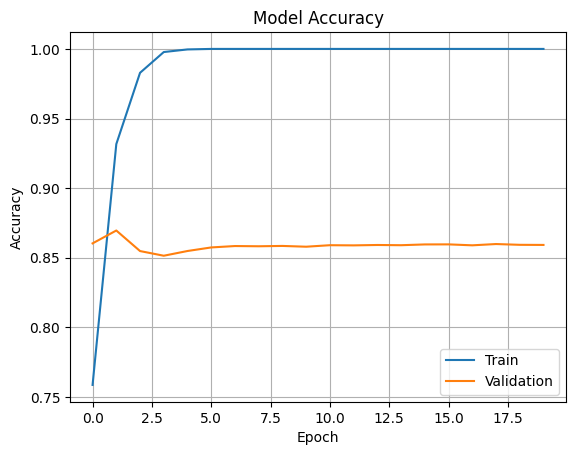

In [18]:
res=embed.evaluate(x_test,y_test, verbose=0)
print('Acc:', res[1]*100)

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

In [4]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM

early = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
embed=Sequential()
embed.add(Embedding(dic_size, embed_space_dim, input_length=sample_size))
embed.add(LSTM(units=32))
embed.add(Dense(1, activation='sigmoid'))
embed.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = embed.fit(x_train,y_train, epochs=40, batch_size=64, validation_split=0.2, verbose=2, callbacks=[early])

embed.summary()

Epoch 1/40
313/313 - 8s - 24ms/step - accuracy: 0.6862 - loss: 0.5749 - val_accuracy: 0.8322 - val_loss: 0.3879
Epoch 2/40
313/313 - 5s - 16ms/step - accuracy: 0.8665 - loss: 0.3228 - val_accuracy: 0.8652 - val_loss: 0.3351
Epoch 3/40
313/313 - 10s - 33ms/step - accuracy: 0.9182 - loss: 0.2204 - val_accuracy: 0.8720 - val_loss: 0.3114
Epoch 4/40
313/313 - 10s - 33ms/step - accuracy: 0.9401 - loss: 0.1696 - val_accuracy: 0.8790 - val_loss: 0.3137
Epoch 5/40
313/313 - 6s - 19ms/step - accuracy: 0.9526 - loss: 0.1367 - val_accuracy: 0.8814 - val_loss: 0.3324
Epoch 6/40
313/313 - 10s - 30ms/step - accuracy: 0.9556 - loss: 0.1310 - val_accuracy: 0.8580 - val_loss: 0.4414
Epoch 7/40
313/313 - 6s - 19ms/step - accuracy: 0.9492 - loss: 0.1355 - val_accuracy: 0.8710 - val_loss: 0.3820
Epoch 8/40
313/313 - 10s - 33ms/step - accuracy: 0.9742 - loss: 0.0797 - val_accuracy: 0.8688 - val_loss: 0.4620
Epoch 9/40
313/313 - 9s - 30ms/step - accuracy: 0.9786 - loss: 0.0651 - val_accuracy: 0.8690 - val_l

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 512, 16)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 498,917 (1.90 MB)

 Trainable params: 166,305 (649.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 332,612 (1.27 MB)

Acc: 87.00399994850159


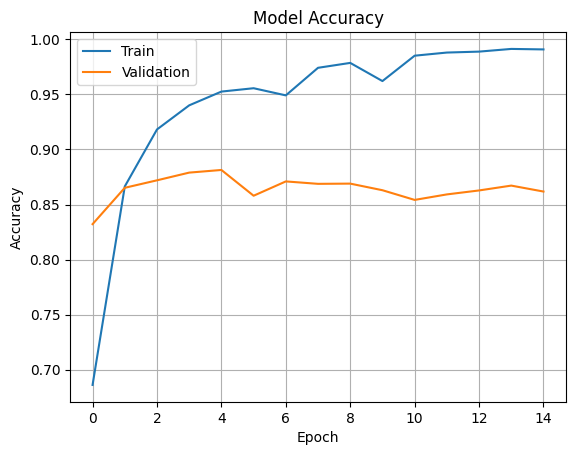

In [5]:
res=embed.evaluate(x_test,y_test, verbose=0)
print('Acc:', res[1]*100)

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()